In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)

In [3]:
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
cols = df.columns
df.shape[0]

541909

In [5]:
df.isnull().sum()/df.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [6]:
for col in cols:
    if(df[col].value_counts().size < 100):
        print(df[col].value_counts())
    #print(df[col].value_counts())

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [7]:
print("So there is no category columns")

So there is no category columns


## Cleaning the data

In [8]:
df = df.dropna()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [9]:
#df['daysold'] = 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [10]:
maxDate = df['InvoiceDate'].max()
minDate = df['InvoiceDate'].min()
print(maxDate, minDate)

df['DaysAsNo'] = (maxDate - df['InvoiceDate']).dt.days
#(maxDate - df['InvoiceDate']).


2011-12-09 12:50:00 2010-12-01 08:26:00


In [11]:
df['amount'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DaysAsNo,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34


## Prepare data for modelling

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DaysAsNo,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34


In [13]:
groupedAmountDf = df.groupby('CustomerID')['amount'].sum()
groupedAmountDf=groupedAmountDf.reset_index()
groupedAmountDf.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [14]:
groupedFrequencytDf = df.groupby('CustomerID')['InvoiceNo'].count()
groupedFrequencytDf=groupedFrequencytDf.reset_index()
groupedFrequencytDf.columns = ['CustomerID', 'frequency']
groupedFrequencytDf.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [15]:

groupedRecencyDf = df.groupby('CustomerID')['DaysAsNo'].min()
groupedRecencyDf=groupedRecencyDf.reset_index()
groupedRecencyDf.columns = ['CustomerID', 'recency']
groupedRecencyDf.head()

,CustomerID,recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [16]:
groupedDf = pd.merge(groupedAmountDf, groupedFrequencytDf, on='CustomerID', how='inner')
groupedDf = pd.merge(groupedDf, groupedRecencyDf, on='CustomerID', how='inner')

In [17]:
# removing (statistical) outliers
Q1 = groupedDf.amount.quantile(0.05)
Q3 = groupedDf.amount.quantile(0.95)
IQR = Q3 - Q1
groupedDf = groupedDf[(groupedDf.amount >= Q1 - 1.5*IQR) & (groupedDf.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = groupedDf.recency.quantile(0.05)
Q3 = groupedDf.recency.quantile(0.95)
IQR = Q3 - Q1
groupedDf = groupedDf[(groupedDf.recency >= Q1 - 1.5*IQR) & (groupedDf.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = groupedDf.frequency.quantile(0.05)
Q3 = groupedDf.frequency.quantile(0.95)
IQR = Q3 - Q1
groupedDf = groupedDf[(groupedDf.frequency >= Q1 - 1.5*IQR) & (groupedDf.frequency <= Q3 + 1.5*IQR)]



In [18]:
groupedDf

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4366,18278.0,173.90,9,73
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7


# Visualizing the Data

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

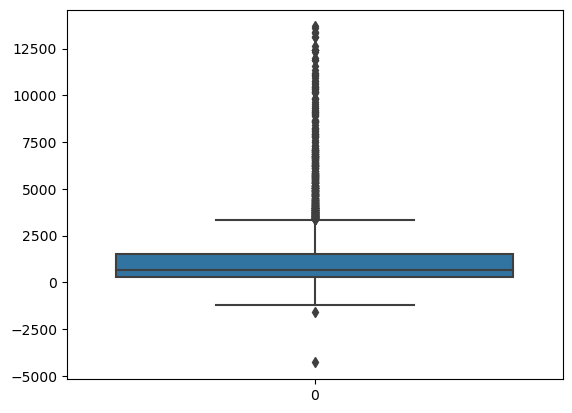

In [20]:
sns.boxplot(groupedDf['amount'])
#amount, frequency, recency

# Scaling

In [21]:
from sklearn.preprocessing import StandardScaler 

In [22]:
num_cols = ['amount','frequency','recency']
scaler = StandardScaler()
std_df = scaler.fit_transform(groupedDf[num_cols])
rfm_df = pd.DataFrame(std_df)

In [23]:
rfm_df.head()

,0,1,2
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# 4. Modelling

In [24]:
from sklearn.cluster import KMeans

In [25]:
#help(KMeans)
kmeans = KMeans(n_clusters = 4, max_iter = 50, random_state = 10)
kmeans.fit(rfm_df)

KMeans(max_iter=50, n_clusters=4, random_state=10)

In [26]:
kmeans.labels_

array([2, 3, 0, ..., 2, 0, 0], dtype=int32)

In [27]:
pd.DataFrame(kmeans.labels_).value_counts()

0    2277
2    1037
3     764
1     215
Name: count, dtype: int64

# 5. Choosign optimial clusters size -  Elbove curve

In [28]:
no_clusters = np.arange(1, 10, 1)
ssd = []
for n_clusters in no_clusters:
    kmeans = KMeans(n_clusters = n_clusters, max_iter = 50, random_state = 10)
    kmeans.fit(rfm_df)
    ssd.append(kmeans.inertia_)
ssd

[12878.999999999996,
 7661.683092517169,
 4433.580619302121,
 3360.3727308247912,
 2802.824128483465,
 2392.151408172493,
 2039.2926366828212,
 1826.7393027341113,
 1640.692227583004]

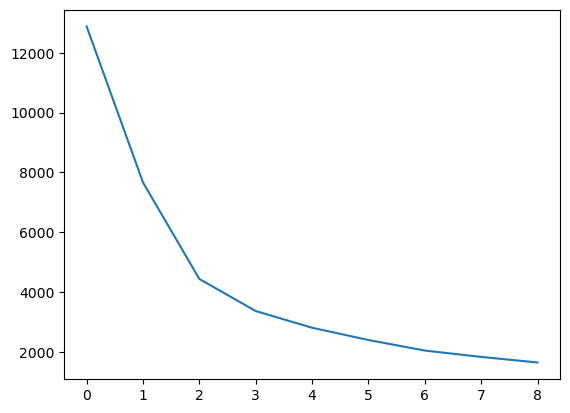

In [29]:
plt.plot(ssd)

# 6. Choosing  optimal no of clusters using Shilloute

In [30]:
from sklearn.metrics import silhouette_score
no_clusters = np.arange(2, 10, 1)
silhouette_scores = []
for n_clusters in no_clusters:
    kmeans = KMeans(n_clusters = n_clusters, max_iter = 50, random_state = 10)
    kmeans.fit(rfm_df)
    cluster_labels = kmeans.labels_
    #silhouette_score(rfm_df, cluster_labels =  kmeans.labels_)
    #print(kmeans.labels_)
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
silhouette_scores

[0.5411246404292334,
 0.5084896296141937,
 0.4816551560193964,
 0.4662700564189704,
 0.41753051875511704,
 0.4150058806779277,
 0.40929591203534893,
 0.4128437970604317]

# 7. Analysis

In [31]:
# we choose no of clusters as 3
kmeans = KMeans(n_clusters = 3, max_iter = 50, random_state = 10)
kmeans.fit(rfm_df)
cluster_labels = kmeans.labels_

In [32]:
groupedDf['label'] = kmeans.labels_
groupedDf

,CustomerID,amount,frequency,recency,label
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2
...,...,...,...,...,...
4366,18278.0,173.90,9,73,0
4367,18280.0,180.60,10,277,2
4368,18281.0,80.82,7,180,2
4369,18282.0,176.60,13,7,0


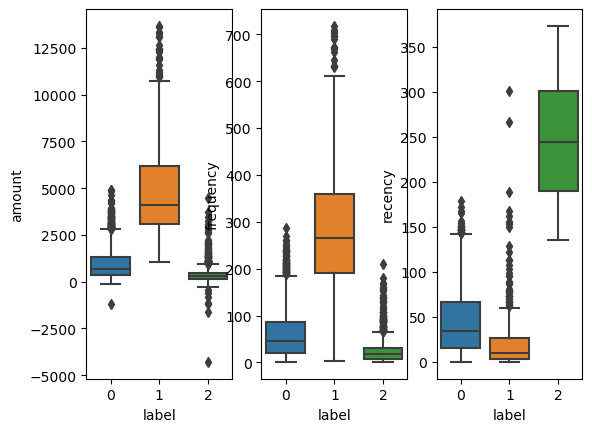

In [33]:
cols = ['amount','frequency','recency']
cnt = 0
fig, axes =plt.subplots(1, 3)
for col in cols:
    sns.boxplot(x='label', y = col, data=groupedDf, ax=axes[cnt])
    cnt+=1

# Hierarchical Clustering 

In [35]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [36]:
groupedDf.head()

,CustomerID,amount,frequency,recency,label
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


In [37]:
rfm_df.head()

,0,1,2
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


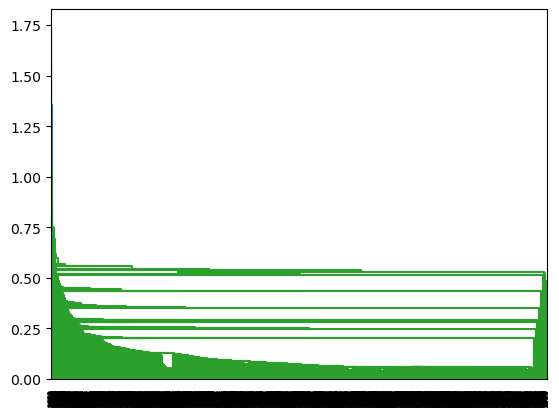

In [41]:
mergings = linkage(rfm_df, method='single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

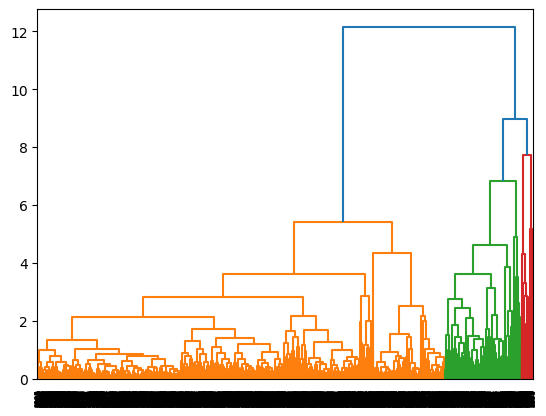

In [42]:
mergings = linkage(rfm_df, method='complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [47]:
hier_clust_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
#groupedDf['label'] = kmeans.labels_
#groupedDf

In [48]:
groupedDf['heir_label'] = hier_clust_labels

In [49]:
groupedDf.head()

,CustomerID,amount,frequency,recency,label,heir_label
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,1,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,0


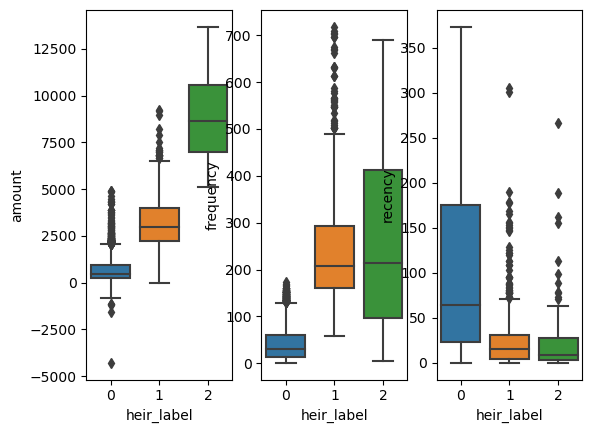

In [50]:
cols = ['amount','frequency','recency']
cnt = 0
fig, axes =plt.subplots(1, 3)
for col in cols:
    sns.boxplot(x='heir_label', y = col, data=groupedDf, ax=axes[cnt])
    cnt+=1